# POC

In [1]:
!pip install -r requirements.txt

In [2]:
# Packages
import os, csv
import numpy as np
import pandas as pd
import nltk
import random
import xgboost as xgb

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
import spacy
from spacy import displacy

spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

nlp.add_pipe("merge_entities")

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
import seaborn as sns

# N- Grams
from nltk.util import ngrams
from collections import Counter

# Topic Modeling
##Feature Extraction
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn import ensemble, metrics, model_selection, naive_bayes

# Word 2 Vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Models
import datetime
from nltk import naivebayes

import warnings
warnings.filterwarnings("ignore")

import spacy, csv, yake, stanza, json
import tensorflow as tf

from datetime import datetime
from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
stanza.download('en')
nltk.download('omw-1.4')

nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')
kw_extractor = yake.KeywordExtractor()
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2022-12-03 16:58:59 INFO: Downloading default packages for language: en (English) ...
2022-12-03 16:59:00 INFO: File exists: C:\Users\ralph\stanza_resources\en\default.zip
2022-12-03 16:59:04 INFO: Finished downloading models and saved to C:\Users\ralph\stanza_resources.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
2022-12-03 16:59:04 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-12-03 16:59:05 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2022-12-03 16:59:05 INFO: Use device: cpu
2022-12-03 16:59:05 INFO: Loading: tokenize
2022-12-03 16:59:05 INFO: Loading: ner
2022-12-03 16:59:06 INFO: Done loading processors!


In [3]:
# Read Data
train = pd.read_csv('../Data/writing_style_dataset.csv', delimiter='*')
test= pd.read_csv('../Data/writing_style_dataset.csv', delimiter='*')

In [4]:
pd.set_option('max_colwidth', 900)
train.text= train.text.astype(str)
train.author = pd.Categorical(train.author)
train.iloc[:20,:]

,text,author
0,According to Vance s response to Lauri s email the nominations should be revised upwards approximately 650 d on the gathering contract s at this meter There is currently nominations of 1 353 d 1 153 gathering and 200 transport The flow should be around 2 000 d Is it alright to include the increase of 650 d with the other revisions to be made after trading on Friday,Robert
1,Effective 3 1 2001 HPLC amended its contract with Royal Production changing the price to 100 HSC less 0 16 and extending the term through 2 28 02 Consequently for March HPLC should be purhasing volumes from two wells at meter 5310 Effective April HPLC amended the same contract releasing the L G Talbert 2 lease in the committed reserves agreement Mike Morris is the gas buyer and expects volumes of approximately 2000mmbtu d For April I nom 1132 d Bob we should probably increase the nom to reflect the incremental production at this point,Vance
2,Louis Cox with Copano the interconnecting party at this meter informed me that effective March 1st we should have been buying incremental gas from Royal Production at this point since they were no longer selling it to Copano There have been no changes in the producer services noms at this point however This point appears to be on a 14 day chart and the last flow I have access to shows noms of 1332mm with BAV of 3497mm on March 18th Bob Vance could one of you guys check into this and see what the nom should be Copano says they re not getting the gas in April either but they do not know how long HPLC is purchasing the incremental gas from Royal Please let me know what the resolution is Thanks,Allen
3,X cc Weissman George O ENRON OU NA CN RECIPIENTS CN NOTESADDR CN 88372C14 8DEBAA6B 862564B5 68FD6F Daren J Farmer HOU ECT ENRON SDaren J Farmer HOU ECT ENRON Graves Melissa O ENRON OU NA CN RECIPIENTS CN MGRAVES Susan Smith HOU ECT ENRON SSusan Smith HOU ECT ENRON,Taylor
4,I m still concern about April s nom if we don t take it to zero than we could have the possibility of the allocations group adding volumes to Barrett s April deal This would be incorrect,Taylor
5,HPLC continues to purchase gas from both Ocean and Seneca on a term basis firm tickets were submitted for April origination beginning with the month of April As for as Barrett they are selling their gas under a JOA with Seneca therefore 100 of Barrett s production is being paid to Seneca Consequently you should see tickets in sitara for both counterparties,Vance
6,Are we still purchasing gas at meter 435 from Barrett Resources Ocean Energy and Seneca Resources They were on George s spreadsheet but they are not termed up The only deals termed up are Mariner St Mary Land Walter Oil Gas and The Meridian Resource,Cotten
7,cc Janie Aguayo HOU ECT ECT Lisa Hesse HOU ECT ECT Julie Meyers HOU ECT ECT Cynthia Hakemack HOU ECT ECT Donald P Reinhardt ENRON enronXgate Susan Smith ENRON enronXgate Melissa Graves ENRON enronXgate George Weissman HOU ECT ECT,Vance
8,HPLC will be purchasing wellhead gas from the producers listed below for the production month of May 2001 This production will be purchased on a spot basis and deal tickets should be created and entered into sitara based on the following information,Vance
9,El Paso Merchant Energy LP 5848 203mmbtu d 85 IF HSC Swift Energy 2630 21mmbtu d 100 IF HSC less 1 38,Vance


In [5]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    words = [lemmatizer.lemmatize(w) for w in words]#5

    return words

def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)

In [6]:
# test case to see if our stemmering and lemmatization is running sussefully
print("The stemmed form of running is: {}".format(ps.stem("running")))
print("The stemmed form of knives is: {}".format(ps.stem("knives")))
print("The lemmatized form of knives is: {}".format(lemmatizer.lemmatize("knives")))

The stemmed form of running is: run
The stemmed form of knives is: knive
The lemmatized form of knives is: knife


In [7]:
print(nltk.word_tokenize(train.text[0]))

['According', 'to', 'Vance', 's', 'response', 'to', 'Lauri', 's', 'email', 'the', 'nominations', 'should', 'be', 'revised', 'upwards', 'approximately', '650', 'd', 'on', 'the', 'gathering', 'contract', 's', 'at', 'this', 'meter', 'There', 'is', 'currently', 'nominations', 'of', '1', '353', 'd', '1', '153', 'gathering', 'and', '200', 'transport', 'The', 'flow', 'should', 'be', 'around', '2', '000', 'd', 'Is', 'it', 'alright', 'to', 'include', 'the', 'increase', 'of', '650', 'd', 'with', 'the', 'other', 'revisions', 'to', 'be', 'made', 'after', 'trading', 'on', 'Friday']


In [8]:
stop_words = set(stopwords.words("english"))
stop_words
len(stop_words)

179

In [9]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = train.copy()
sentiment['polarity_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['pos'])
sentiment['sentiment']=''
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

# Normalize for Size
auth_sent= sentiment.groupby(['author','sentiment'])[['text']].count().reset_index()
for x in ['hello']:
    auth_sent.text[auth_sent.author == x] = (auth_sent.text[auth_sent.author == x]/\
        auth_sent[auth_sent.author ==x].text.sum())*100

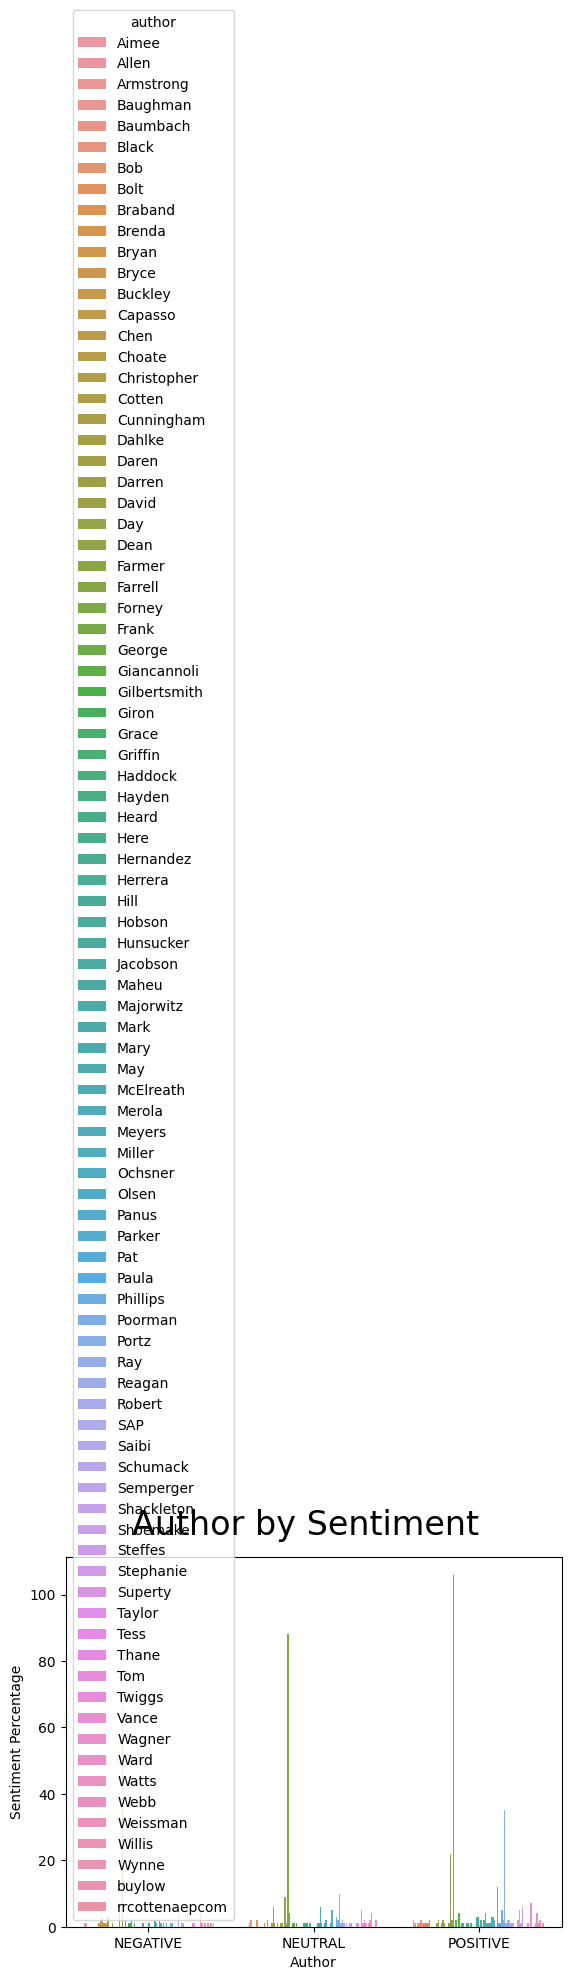

In [10]:
ax= sns.barplot(x='sentiment', y='text',hue='author',data=auth_sent)
ax.set(xlabel='Author', ylabel='Sentiment Percentage')
ax.figure.suptitle("Author by Sentiment", fontsize = 24)
plt.show()

In [11]:
stop_words = set(stopwords.words("english"))
stop_words
len(stop_words)

179

In [12]:
## number of words in text 
train['num_words'] = train['text'].apply(lambda x : len(str(x).split()))
test['num_words'] = test['text'].apply(lambda x : len(str(x).split()))

## number of unique words in the text 
train['unique_words'] = train['text'].apply(lambda x : len(set(str(x).split())))
test['unique_words'] = test['text'].apply(lambda x : len(set(str(x).split())))

## num of characters in the text
train['char'] = train['text'].apply(lambda x : len(str(x)))
test['char'] = test['text'].apply(lambda x : len(str(x)))

## num of stop_words
train['stop_words'] = train['text'].apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))
test['stop_words'] = test['text'].apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))

## num of punctuations 
train['punc'] = train['text'].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))
test['punc'] = test['text'].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))

## num of upper case words
train['upper_case'] = train['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test['upper_case'] = test['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## number of title case words 
train['title_case'] = train['text'].apply(lambda x : len([c for c in str(x).split() if c.istitle()]))
test['title_case'] = test['text'].apply(lambda x : len([c for c in str(x).split() if c.istitle()]))

## average len words 
train['avg_words'] = train['text'].apply(lambda x : np.mean([len(w) for w in str(x).split()]))
test['avg_words'] = test['text'].apply(lambda x : np.mean([len(w) for w in str(x).split()]))

<AxesSubplot: xlabel='author', ylabel='avg_words'>

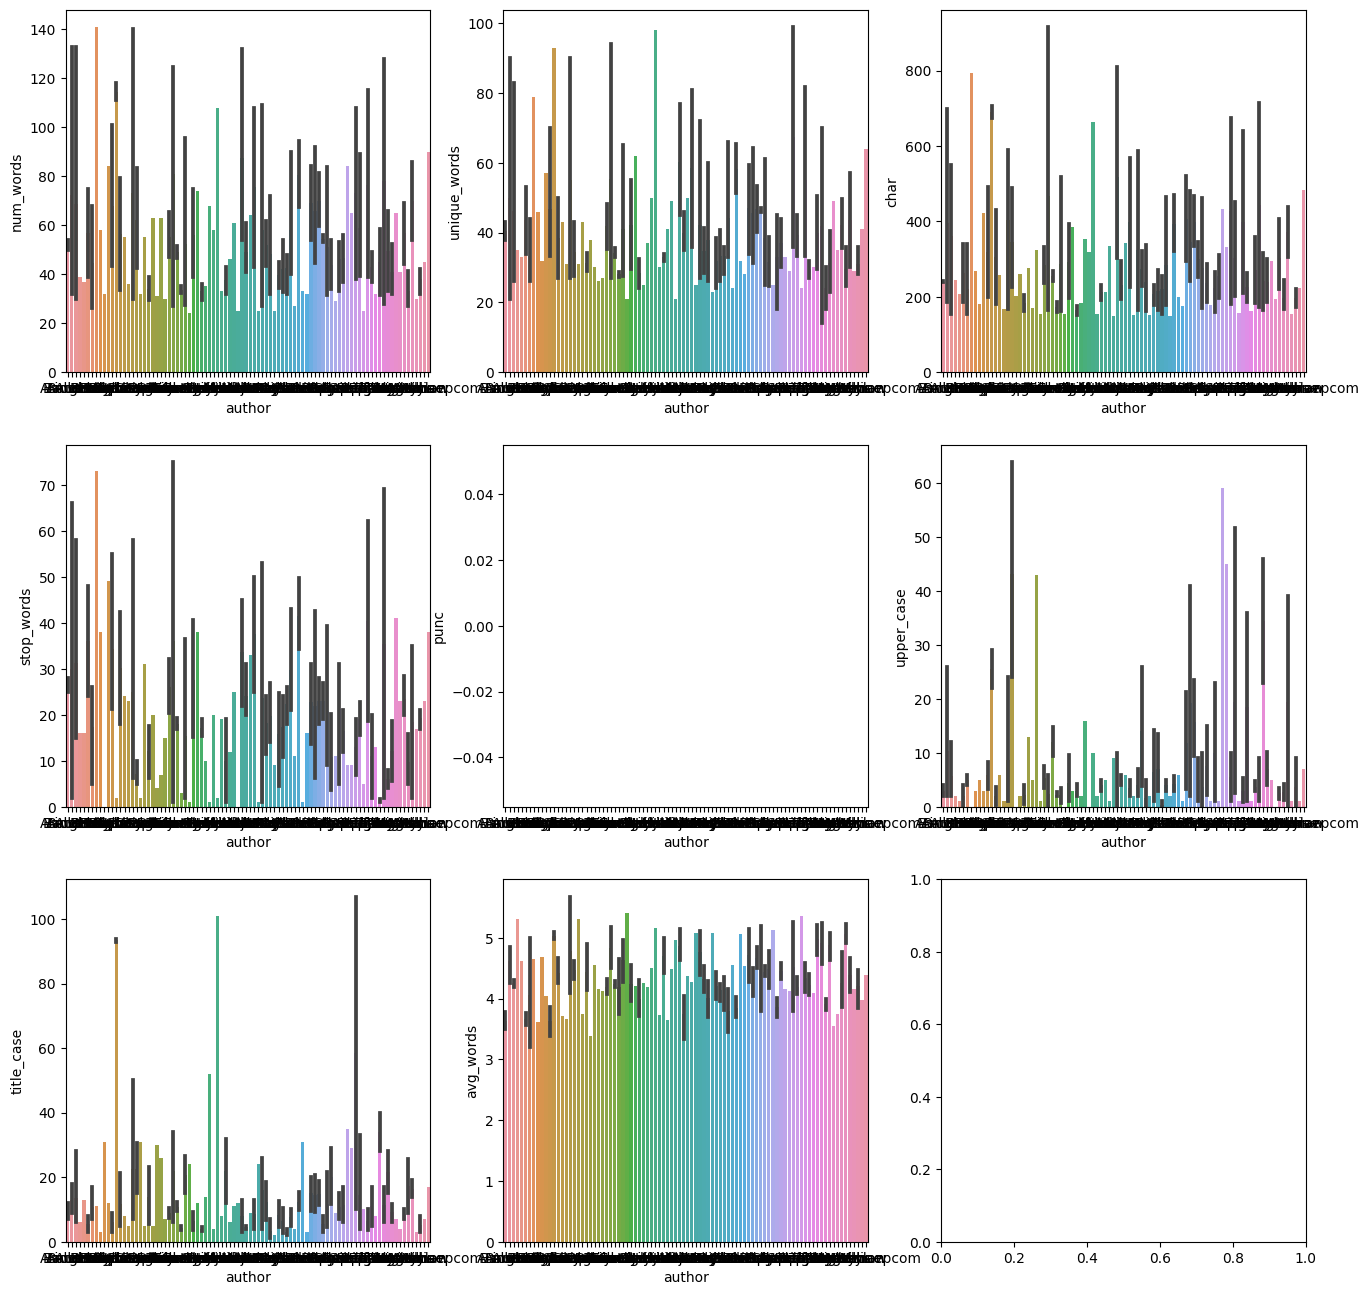

In [13]:
## plot some graphs based on some new features 
#features = ['num_words','unique_word','char','stop_words','punc','upper_case','title_case','mean_words']
_, axes = plt.subplots(3,3, figsize=(16,16))
axes = axes.flatten()
sns.barplot(x = 'author' , y = 'num_words' , data = train,ax=axes[0])
sns.barplot(x = 'author' , y = 'unique_words' , data = train,ax=axes[1])
sns.barplot(x = 'author' , y = 'char' , data = train,ax=axes[2])
sns.barplot(x = 'author' , y = 'stop_words' , data = train,ax=axes[3])
sns.barplot(x = 'author' , y = 'punc' , data = train,ax=axes[4])
sns.barplot(x = 'author' , y = 'upper_case' , data = train,ax=axes[5])
sns.barplot(x = 'author' , y = 'title_case' , data = train,ax=axes[6])
sns.barplot(x = 'author' , y = 'avg_words' , data = train,ax=axes[7])

#for i, feature in enumerate(features):
#    sns.barplot(x='author', y=feature, data=train, ax=axes[int(i/3),i%3])
#plt.show()

#### Logistic Regression

In [14]:
X = train['text']
y = train['author']

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=8)

In [16]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(477,) (477,) (120,) (120,)


In [17]:
print(train_y.value_counts(),'\n', test_y.value_counts())

Forney       208
Portz         35
Farmer        30
Parker        14
May           11
            ... 
Haddock        0
Merola         0
Baumbach       0
Semperger      0
Griffin        0
Name: author, Length: 90, dtype: int64 
 Forney            52
Portz             10
Farmer             8
Parker             4
Cotten             4
                  ..
Mark               0
McElreath          0
Miller             0
Panus              0
rrcottenaepcom     0
Name: author, Length: 90, dtype: int64


In [18]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vect = CountVectorizer()
vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\;|\:')

In [19]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
train_X_dtm = vect.fit_transform(train_X)
# examine the document-term matrix created from X_train
train_X_dtm

<477x3935 sparse matrix of type '<class 'numpy.int64'>'
	with 18289 stored elements in Compressed Sparse Row format>

In [20]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<120x3935 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

In [21]:
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')


In [22]:
from string import punctuation
train_X_chars = train_X.str.len()
train_X_punc = train_X.apply(lambda x: len([c for c in str(x) if c in punctuation]))
test_X_chars = test_X.str.len()
test_X_punc = test_X.apply(lambda x: len([c for c in str(x) if c in punctuation]))
train_X_dtm = add_feature(train_X_dtm, [train_X_chars, train_X_punc])
test_X_dtm = add_feature(test_X_dtm, [test_X_chars, test_X_punc])

In [23]:
train_X_dtm

<477x3937 sparse matrix of type '<class 'numpy.int64'>'
	with 18766 stored elements in Compressed Sparse Row format>

In [24]:
test_X_dtm

<120x3937 sparse matrix of type '<class 'numpy.int64'>'
	with 4223 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=8)
logreg

LogisticRegression(random_state=8)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_values = {'C':[0.01, 0.1, 1.0, 3.0, 5.0]}
grid_logreg = GridSearchCV(logreg, param_grid=grid_values, scoring='neg_log_loss')
grid_logreg.fit(train_X_dtm, train_y)
grid_logreg.best_params_

{'C': 0.01}

In [28]:
# set with recommended parameter
logreg = LogisticRegression(C=1.0, random_state=8)
# train the model using train_X_dtm & train_y
logreg.fit(train_X_dtm, train_y)

LogisticRegression(random_state=8)

In [29]:
# make class predictions for test_X_dtm
y_pred_test = logreg.predict(test_X_dtm)

In [30]:
# look at the confusion matrix for y_test
metrics.confusion_matrix(test_y, y_pred_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [31]:
# compute the predicted probabilities for X_test_dtm
y_pred_prob = logreg.predict_proba(test_X_dtm)
y_pred_prob[:10]

array([[1.10552381e-17, 7.18629238e-16, 3.39900843e-18, 3.10545078e-17,
        7.02779265e-18, 2.65210032e-17, 1.15390186e-17, 3.70425396e-17,
        1.43521320e-17, 1.33813228e-18, 1.74358770e-15, 1.76970753e-18,
        1.36434447e-17, 3.13413925e-21, 3.17708397e-17, 1.13843885e-06,
        1.76168996e-17, 3.28499502e-18, 1.35726200e-14, 4.20467187e-19,
        4.19864978e-23, 1.86463880e-17, 1.04347228e-03, 3.87828207e-17,
        3.01135517e-17, 6.00658924e-19, 3.81322574e-17, 6.72422657e-17,
        1.00996492e-17, 5.51404321e-18, 2.69668676e-16, 3.68821623e-18,
        1.43887145e-20, 1.46110490e-17, 6.42435558e-19, 3.72021898e-18,
        1.39845459e-17, 3.21137214e-17, 1.41558331e-17, 4.30773259e-19,
        6.47518178e-17, 6.49131559e-08, 6.64261870e-17, 6.27350285e-17,
        1.02186800e-15, 4.03058161e-17, 3.98048629e-17, 2.78079248e-19,
        1.99106421e-23, 2.40495993e-21, 8.07708133e-18, 1.67972814e-13,
        3.29312004e-16, 9.98955324e-01, 1.84355902e-17, 2.969343

In [32]:
train = pd.read_csv('../Data/writing_style_dataset.csv', delimiter='*')
## look at the first few rows
train.head()

,text,author
0,According to Vance s response to Lauri s email the nominations should be revised upwards approximately 650 d on the gathering contract s at this meter There is currently nominations of 1 353 d 1 153 gathering and 200 transport The flow should be around 2 000 d Is it alright to include the increase of 650 d with the other revisions to be made after trading on Friday,Robert
1,Effective 3 1 2001 HPLC amended its contract with Royal Production changing the price to 100 HSC less 0 16 and extending the term through 2 28 02 Consequently for March HPLC should be purhasing volumes from two wells at meter 5310 Effective April HPLC amended the same contract releasing the L G Talbert 2 lease in the committed reserves agreement Mike Morris is the gas buyer and expects volumes of approximately 2000mmbtu d For April I nom 1132 d Bob we should probably increase the nom to reflect the incremental production at this point,Vance
2,Louis Cox with Copano the interconnecting party at this meter informed me that effective March 1st we should have been buying incremental gas from Royal Production at this point since they were no longer selling it to Copano There have been no changes in the producer services noms at this point however This point appears to be on a 14 day chart and the last flow I have access to shows noms of 1332mm with BAV of 3497mm on March 18th Bob Vance could one of you guys check into this and see what the nom should be Copano says they re not getting the gas in April either but they do not know how long HPLC is purchasing the incremental gas from Royal Please let me know what the resolution is Thanks,Allen
3,X cc Weissman George O ENRON OU NA CN RECIPIENTS CN NOTESADDR CN 88372C14 8DEBAA6B 862564B5 68FD6F Daren J Farmer HOU ECT ENRON SDaren J Farmer HOU ECT ENRON Graves Melissa O ENRON OU NA CN RECIPIENTS CN MGRAVES Susan Smith HOU ECT ENRON SSusan Smith HOU ECT ENRON,Taylor
4,I m still concern about April s nom if we don t take it to zero than we could have the possibility of the allocations group adding volumes to Barrett s April deal This would be incorrect,Taylor


In [41]:
### Split data

# split the data by author
byAuthor = train.groupby("author")

### Tokenize (split into individual words) our text

# word frequency by author
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    # split the text into individual tokens    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    # calculate the frequency of each token
    frequency = nltk.FreqDist(tokens)

    # add the frequencies for each author to our dictionary
    wordFreqByAuthor[name] = (frequency)
    
# now we have an dictionary where each entry is the frequency distrobution
# of words for a specific author.     

# Detecting whether a sentence is Interrogative or Not?

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

nltk.download('nps_chat')
posts = nltk.corpus.nps_chat.xml_posts()


posts_text = [post.text for post in posts]

#divide train and test in 80 20
train_text = posts_text[:int(len(posts_text)*0.8)]
test_text = posts_text[int(len(posts_text)*0.2):]

#Get TFIDF features
vectorizer = TfidfVectorizer(ngram_range=(1,3), 
                             min_df=0.001, 
                             max_df=0.7, 
                             analyzer='word')

X_train = vectorizer.fit_transform(train_text)
X_test = vectorizer.transform(test_text)

y = [post.get('class') for post in posts]

y_train = y[:int(len(posts_text)*0.8)]
y_test = y[int(len(posts_text)*0.2):]

# Fitting Gradient Boosting classifier to the Training set
gb = GradientBoostingClassifier(n_estimators = 400, random_state=0)
#Can be improved with Cross Validation

gb.fit(X_train, y_train)

predictions_rf = gb.predict(X_test)

#Accuracy of 86% not bad
print(classification_report(y_test, predictions_rf))

In [43]:
with open('../Data/dic_allThreads.txt') as f:
    json_data = json.load(f)
    
from re import search

student_header = ['name', 'age']
    
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

data= []

st_data = []
st_data_ = []

for x in range(1, 5):
    first_key = list(json_data.values())[x]
    
    try:
        first_ = list(first_key.values())[1]
    except IndexError:
        first_ = list(first_key.values())[0]
    
    
    activity_search = '{'
    
    x = first_[4].split("From:")
    r = 0
    
    with open('author_activity_relationship.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(student_header)   
        
        for z in first_[7]:
            
            activity = z[0].split('{')
            print('Activity: ' + activity[0])
            testSentence = z[5]
            preProcessedTestSentence = nltk.tokenize.word_tokenize(testSentence.lower())
            testProbailities = pd.DataFrame(columns = ['author','word','probability'])
            for i in wordFreqByAuthor.keys():
                for j  in preProcessedTestSentence:
                    
                    wordFreq = wordFreqByAuthor[i].freq(j)
                    smoothedWordFreq = wordFreq + 0.000001
                    output = pd.DataFrame([[i, j, smoothedWordFreq]], columns = ['author','word','probability'])
                    testProbailities = testProbailities.append(output, ignore_index = True)
            testProbailitiesByAuthor = pd.DataFrame(columns = ['author','jointProbability'])
            
            for i in wordFreqByAuthor.keys():
                oneAuthor = testProbailities.query('author == "' + i + '"')
                jointProbability = oneAuthor.product(numeric_only = True)[0]
                output = pd.DataFrame([[i, jointProbability]], columns = ['author','jointProbability'])
                testProbailitiesByAuthor = testProbailitiesByAuthor.append(output, ignore_index = True)
            
            print('Identified Author: ' + testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author'])   
            st_data = [activity[0], testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author']]
            print(st_data)
            st_data_.append([activity[0], testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author']])
        writer.writerows(st_data_)

Activity: create deal
Identified Author: Robert
['create deal', 'Robert']
Activity: enter deal
Identified Author: Robert
['enter deal', 'Robert']
Activity: enter deal
Identified Author: Vance
['enter deal', 'Vance']
Activity: create deal
Identified Author: Robert
['create deal', 'Robert']
Activity: enter deal
Identified Author: Robert
['enter deal', 'Robert']
Activity: note deal
Identified Author: Robert
['note deal', 'Robert']
Activity: enter deal
Identified Author: Parker
['enter deal', 'Parker']
Activity: see_understand_determine_check gas
Identified Author: Parker
['see_understand_determine_check gas', 'Parker']
Activity: flow deal
Identified Author: Parker
['flow deal', 'Parker']


In [80]:
import pandas
data = pandas.read_csv("author_activity_relationship.csv")
data_grp = data.groupby(['name','age'])['age'].count()
data_grp.to_csv("spend.csv")

In [ ]:
with open('../Data/dic_allThreads.txt') as f:
    json_data = json.load(f)
    
from re import search
    
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20
data= []

for x in range(3, 10):
    first_key = list(json_data.values())[x]

    try:
        first_ = list(first_key.values())[1]
    except IndexError:
        first_ = list(first_key.values())[0]
    
    activity_search = ''
    SpeechAct_search = ''
    if not search(activity_search, str(first_[7])):
        x = first_[4].split("From:")
        r = 0
                
        for z in first_[7]:
            activity = z[0].split('{')
            if not search(activity_search.replace('{',''),str(activity[0])):
                activity = z[0].split('{')

                data = pandas.read_csv("spend.csv")
                data.groupby("age").max()
                data.loc[data['name'] == activity[0]]
                author_most_interact = data.loc[data['count'].idxmax()]
                
                ami = author_most_interact['age']
                
                testSentence = z[5]
                doc = nlp(testSentence)
                                
                preProcessedTestSentence = nltk.tokenize.word_tokenize(testSentence.lower())
                
                testProbailities = pd.DataFrame(columns = ['author','word','probability'])
                
                for i in wordFreqByAuthor.keys():
                    for j  in preProcessedTestSentence:
                        wordFreq = wordFreqByAuthor[i].freq(j)
                        smoothedWordFreq = wordFreq + 0.000001
                        output = pd.DataFrame([[i, j, smoothedWordFreq]], columns = ['author','word','probability'])
                        testProbailities = testProbailities.append(output, ignore_index = True)
                        
                testProbailitiesByAuthor = pd.DataFrame(columns = ['author','jointProbability'])
                
                for i in wordFreqByAuthor.keys():
                    oneAuthor = testProbailities.query('author == "' + i + '"')
                    jointProbability = oneAuthor.product(numeric_only = True)[0]
                    
                    output = pd.DataFrame([[i, jointProbability]], columns = ['author','jointProbability'])
                    testProbailitiesByAuthor = testProbailitiesByAuthor.append(output, ignore_index = True)
                    
                i_author = testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author']
            
                if ami.__eq__(i_author) and SpeechAct_search.__eq__(str(z[4])):
                    print('Identified Author: ' + testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author'])  
                    print('Activity: ' + activity[0])
                    #print('Sentence: ' + z[5])
                    print('Sentence: ')
                    print(" ".join([t.text if not t.ent_type_ else t.ent_type_ for t in doc]) )
                    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
                    keywords = custom_kw_extractor.extract_keywords(z[5])
                    print('Business context information: ' + str(keywords))
                    print('Business data: ' + str(z[3]))
                    print('SpeechAct: ' + str(z[4]))
                #print('Sentiment: ' + str(sid.polarity_scores(z[5])))
                #print('SpeechAct: ' + str(gb.predict(vectorizer.transform([z[5]]))))